In [1]:
# initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import statsmodels.api as sm 
import seaborn as sns

In [2]:
# pip install seaborn

In [3]:
#Create paths
c1_spy_path = Path('c1_spy_af.csv')
c1_vht_path = Path('c1_vht_af.csv')
c1_xlf_path = Path('c1_xlf_af.csv')
c2_spy_path = Path('c2_spy_af.csv')
c2_vht_path = Path('c2_vht_af.csv')
c2_xlf_path = Path('c2_xlf_af.csv')
c3_spy_path = Path('c3_spy_af.csv')
c3_vht_path = Path('c3_vht_af.csv')
c3_xlf_path = Path('c3_xlf_af.csv')
f_spy_path = Path('f_spy_af.csv')
f_vht_path = Path('f_vht_af.csv')
f_xlf_path = Path('f_xlf_af.csv')

In [4]:
#Read Paths
c1_spy_df = pd.read_csv(c1_spy_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c1_vht_df = pd.read_csv(c1_vht_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c1_xlf_df = pd.read_csv(c1_xlf_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c2_spy_df = pd.read_csv(c2_spy_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c2_vht_df = pd.read_csv(c2_vht_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c2_xlf_df = pd.read_csv(c2_xlf_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c3_spy_df = pd.read_csv(c3_spy_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c3_vht_df = pd.read_csv(c3_vht_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
c3_xlf_df = pd.read_csv(c3_xlf_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
f_spy_df = pd.read_csv(f_spy_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
f_vht_df = pd.read_csv(f_vht_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
f_xlf_df = pd.read_csv(f_xlf_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [5]:
c1_spy_df.head()

,Close
Date,
2006-01-03,126.70
2006-01-04,127.30
2006-01-05,127.38
2006-01-06,128.44
2006-01-09,128.77


In [6]:
# Dip 1 - Create a new pivot table where the columns are the closing prices for each ticker
combined_df1 = pd.concat([c1_xlf_df, c1_vht_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df1.sort_index(inplace=True)

# Set column names
combined_df1.columns = ['XLF1', 'VHT1']

# Display a few rows
combined_df1.head()

,XLF1,VHT1
Date,,
2006-01-03,21.23,54.56
2006-01-04,21.21,55.13
2006-01-05,21.28,55.13
2006-01-06,21.41,55.50
2006-01-09,21.47,55.86


In [7]:
#Dip 1 - Use the `pct_change` function to calculate daily returns
daily_returns1 = combined_df1.pct_change()
daily_returns1.head()

,XLF1,VHT1
Date,,
2006-01-03,NaN,NaN
2006-01-04,-0.000942,0.010447
2006-01-05,0.003300,0.000000
2006-01-06,0.006109,0.006711
2006-01-09,0.002802,0.006486


In [8]:
# Dip 2 - Create a new pivot table where the columns are the closing prices for each ticker
combined_df2 = pd.concat([c2_xlf_df, c2_vht_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df2.sort_index(inplace=True)

# Set column names
combined_df2.columns = ['XLF2', 'VHT2']

# Display a few rows
combined_df2.head()

,XLF2,VHT2
Date,,
2014-01-02,14.33,100.58
2014-01-03,14.43,100.81
2014-01-06,14.45,100.40
2014-01-07,14.45,101.57
2014-01-08,14.50,102.56


In [9]:
#Dip 2 - Use the `pct_change` function to calculate daily returns
daily_returns2 = combined_df2.pct_change()
daily_returns2.head()

,XLF2,VHT2
Date,,
2014-01-02,NaN,NaN
2014-01-03,0.006978,0.002287
2014-01-06,0.001386,-0.004067
2014-01-07,0.000000,0.011653
2014-01-08,0.003460,0.009747


In [10]:
# Dip 3 - Create a new pivot table where the columns are the closing prices for each ticker
combined_df3 = pd.concat([c3_xlf_df, c3_vht_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df3.sort_index(inplace=True)

# Set column names
combined_df3.columns = ['XLF3', 'VHT3']

# Display a few rows
combined_df3.head()

,XLF3,VHT3
Date,,
2017-01-03,23.51,128.34
2017-01-04,23.70,129.59
2017-01-05,23.46,130.15
2017-01-06,23.54,130.55
2017-01-09,23.38,131.54


In [11]:
#Dip 3 - Use the `pct_change` function to calculate daily returns
daily_returns3 = combined_df3.pct_change()
daily_returns3.head()

,XLF3,VHT3
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.008082,0.009740
2017-01-05,-0.010127,0.004321
2017-01-06,0.003410,0.003073
2017-01-09,-0.006797,0.007583


In [12]:
# 10 year historical- Create a new pivot table where the columns are the closing prices for each ticker
combined_df10 = pd.concat([f_xlf_df, f_vht_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df10.sort_index(inplace=True)

# Set column names
combined_df10.columns = ['XLF10', 'VHT10']

# Display a few rows
combined_df10.head()

,XLF10,VHT10
Date,,
2010-01-04,11.93,54.94
2010-01-05,12.15,54.60
2010-01-06,12.17,54.91
2010-01-07,12.43,55.10
2010-01-08,12.36,55.30


In [13]:
#Dip 3 - Use the `pct_change` function to calculate daily returns
daily_returns10 = combined_df10.pct_change()
daily_returns10.head()

,XLF10,VHT10
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.018441,-0.006189
2010-01-06,0.001646,0.005678
2010-01-07,0.021364,0.003460
2010-01-08,-0.005632,0.003630


In [14]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
#volatility dip #1
volatility1 = daily_returns1.std() * np.sqrt(252)
volatility1.sort_values(inplace=True)
volatility1

VHT1    0.192208
XLF1    0.461902
dtype: float64

In [15]:
#volatility dip #2
volatility2 = daily_returns2.std() *np.sqrt(252)
volatility2.sort_values(inplace=True)
volatility2

VHT2    0.149268
XLF2    0.322006
dtype: float64

In [16]:
#volatility dip #3
volatility3 = daily_returns3.std() *np.sqrt(252)
volatility3.sort_values(inplace=True)
volatility3

VHT3    0.140177
XLF3    0.163448
dtype: float64

In [17]:
#volatility 10 year historical
volatility10 = daily_returns10.std() *np.sqrt(252)
volatility10.sort_values(inplace=True)
volatility10

VHT10    0.172947
XLF10    0.232905
dtype: float64

In [18]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# xlf1, vht1
weights = [0.50, 0.50]
portfolio_returns1 = daily_returns1.dot(weights)
portfolio_returns1.head()

Date
2006-01-03         NaN
2006-01-04    0.004753
2006-01-05    0.001650
2006-01-06    0.006410
2006-01-09    0.004644
dtype: float64

In [19]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# xlf2, vht2
weights = [0.50, 0.50]
portfolio_returns2 = daily_returns2.dot(weights)
portfolio_returns2.head()

Date
2014-01-02         NaN
2014-01-03    0.004633
2014-01-06   -0.001341
2014-01-07    0.005827
2014-01-08    0.006604
dtype: float64

In [20]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# xlf3, vht3
weights = [0.50, 0.50]
portfolio_returns3 = daily_returns3.dot(weights)
portfolio_returns3.head()

Date
2017-01-03         NaN
2017-01-04    0.008911
2017-01-05   -0.002903
2017-01-06    0.003242
2017-01-09    0.000393
dtype: float64

In [21]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# xlf10, vht10
weights = [0.50, 0.50]
portfolio_returns10 = daily_returns10.dot(weights)
portfolio_returns10.head()

Date
2010-01-04         NaN
2010-01-05    0.006126
2010-01-06    0.003662
2010-01-07    0.012412
2010-01-08   -0.001001
dtype: float64

In [22]:
#Dip1  Use the `cumprod` function to calculate cumulative returns
cumulative_returns1 = (1 + portfolio_returns1).cumprod()
cumulative_returns1.head()

Date
2006-01-03         NaN
2006-01-04    1.004753
2006-01-05    1.006411
2006-01-06    1.012862
2006-01-09    1.017566
dtype: float64

In [23]:
#Dip2  Use the `cumprod` function to calculate cumulative returns
cumulative_returns2 = (1 + portfolio_returns2).cumprod()
cumulative_returns2.head()

Date
2014-01-02         NaN
2014-01-03    1.004633
2014-01-06    1.003286
2014-01-07    1.009132
2014-01-08    1.015796
dtype: float64

In [24]:
#Dip3  Use the `cumprod` function to calculate cumulative returns
cumulative_returns3 = (1 + portfolio_returns3).cumprod()
cumulative_returns3.head()

Date
2017-01-03         NaN
2017-01-04    1.008911
2017-01-05    1.005982
2017-01-06    1.009243
2017-01-09    1.009640
dtype: float64

In [25]:
#10 year historical Use the `cumprod` function to calculate cumulative returns
cumulative_returns10 = (1 + portfolio_returns10).cumprod()
cumulative_returns10.head()

Date
2010-01-04         NaN
2010-01-05    1.006126
2010-01-06    1.009810
2010-01-07    1.022344
2010-01-08    1.021321
dtype: float64

In [26]:
# Dip 1 with SPY Use the concat function to combine the DataFrames by column and perform an inner join including SPY
combined_df1spy = pd.concat([c1_xlf_df, c1_vht_df, c1_spy_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df1spy.sort_index(inplace=True)

# Display a few rows
combined_df1spy.head()

,Close,Close,Close
Date,,,
2006-01-03,21.23,54.56,126.70
2006-01-04,21.21,55.13,127.30
2006-01-05,21.28,55.13,127.38
2006-01-06,21.41,55.50,128.44
2006-01-09,21.47,55.86,128.77


In [27]:
# Dip 1 Rename the columns to match the corresponding stock
combined_df1spy.columns = ['XLF1', 'VHT1', 'SPY1']
combined_df1spy.head()

,XLF1,VHT1,SPY1
Date,,,
2006-01-03,21.23,54.56,126.70
2006-01-04,21.21,55.13,127.30
2006-01-05,21.28,55.13,127.38
2006-01-06,21.41,55.50,128.44
2006-01-09,21.47,55.86,128.77


In [28]:
#Dip 1 Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns1spy = combined_df1spy.pct_change()
daily_returns1spy.head()

,XLF1,VHT1,SPY1
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,-0.000942,0.010447,0.004736
2006-01-05,0.003300,0.000000,0.000628
2006-01-06,0.006109,0.006711,0.008322
2006-01-09,0.002802,0.006486,0.002569


In [29]:
# Dip 1 Calculate covariance of all daily returns of XLF1 vs. SPY1
covariance1xlf = daily_returns1spy['XLF1'].cov(daily_returns1spy['SPY1'])
covariance1xlf

0.000385608142145599

In [30]:
# Dip 1 Calculate covariance of all daily returns of VHT1 vs. SPY1
covariance1vht = daily_returns1spy['VHT1'].cov(daily_returns1spy['SPY1'])
covariance1vht

0.00016320853014963505

In [31]:
# Calculate variance of all daily returns of XLF1 vs. SPY1
variance1xlf = daily_returns1spy['XLF1'].var()
variance1xlf

0.0008466422595027023

In [32]:
# Calculate variance of all daily returns of VHT1 vs. SPY1
variance1vht = daily_returns1spy['VHT1'].var()
variance1vht

0.00014660254884701313

In [33]:
# Calculate beta of all daily returns of XLT1
xlf1_beta = covariance1xlf/ variance1xlf
xlf1_beta

0.45545581716189804

In [34]:
# Calculate beta of all daily returns of VHT1
vht1_beta = covariance1vht/ variance1vht
vht1_beta

1.1132721186174672

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of VHT1 Returns vs. SPY'}, xlabel='Date'>

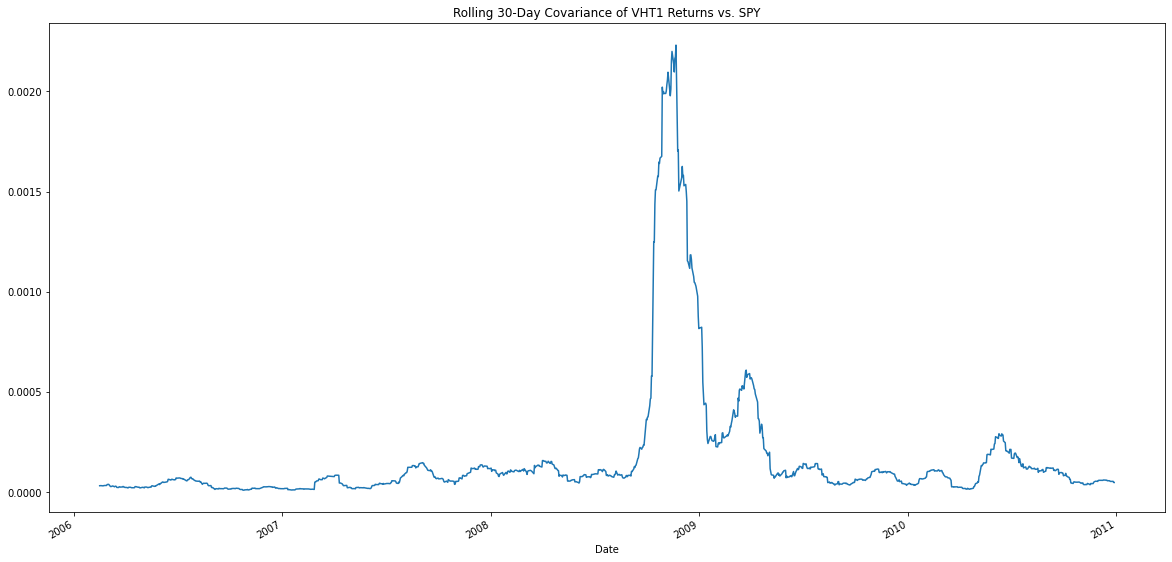

In [35]:
# Calculate 30-day rolling covariance of VHT1 vs. SPY and plot the data
rolling_covariancevht1 = daily_returns1spy['VHT1'].rolling(window=30).cov(daily_returns1spy['SPY1'])
rolling_covariancevht1.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of VHT1 Returns vs. SPY')

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of XLF1 Returns vs. SPY'}, xlabel='Date'>

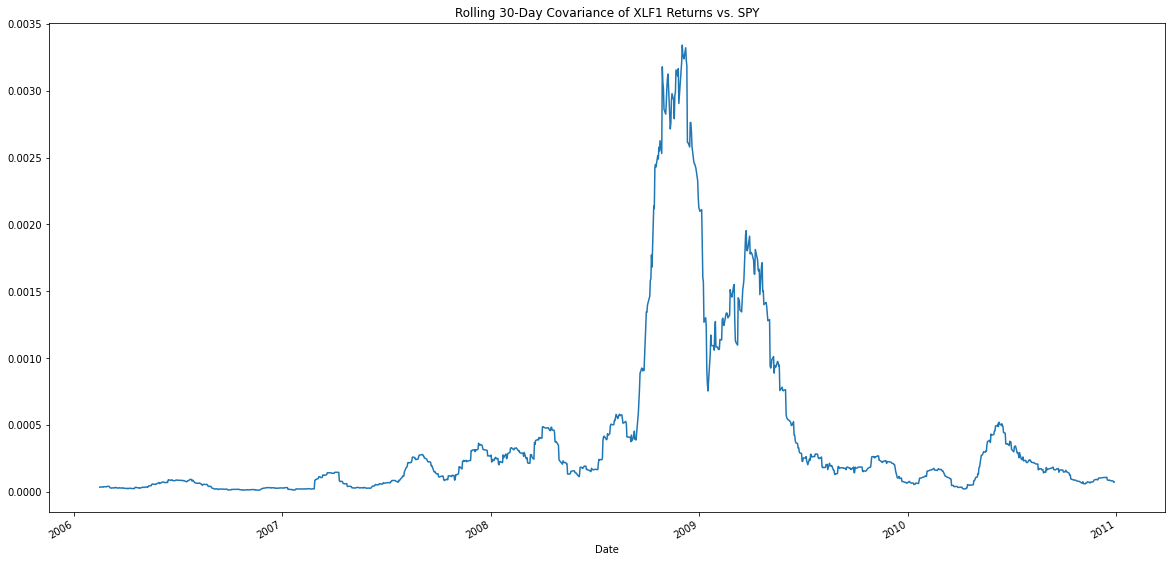

In [36]:
# Calculate 30-day rolling covariance of XLF11 vs. SPY and plot the data
rolling_covariancexlf1 = daily_returns1spy['XLF1'].rolling(window=30).cov(daily_returns1spy['SPY1'])
rolling_covariancexlf1.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of XLF1 Returns vs. SPY')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of SPY Returns'}, xlabel='Date'>

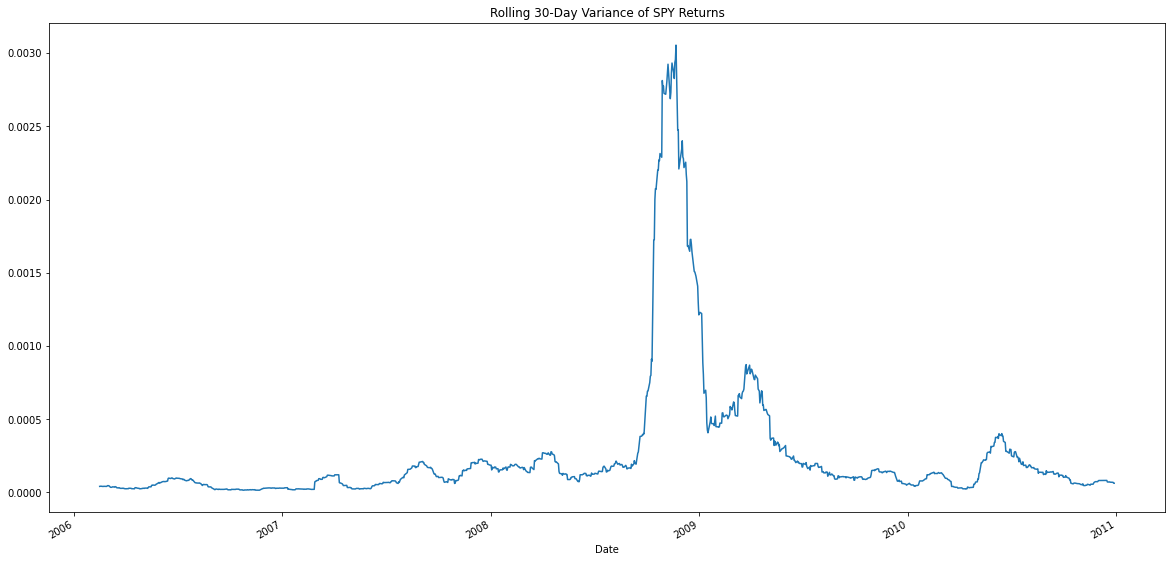

In [37]:
# Calculate 30-day rolling variance of VHT1 vs. SPY1 and plot the data
rolling_variancevht1 = daily_returns1spy['SPY1'].rolling(window=30).var()
rolling_variancevht1.plot(figsize=(20, 10), title='Rolling 30-Day Variance of SPY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of SPY Returns'}, xlabel='Date'>

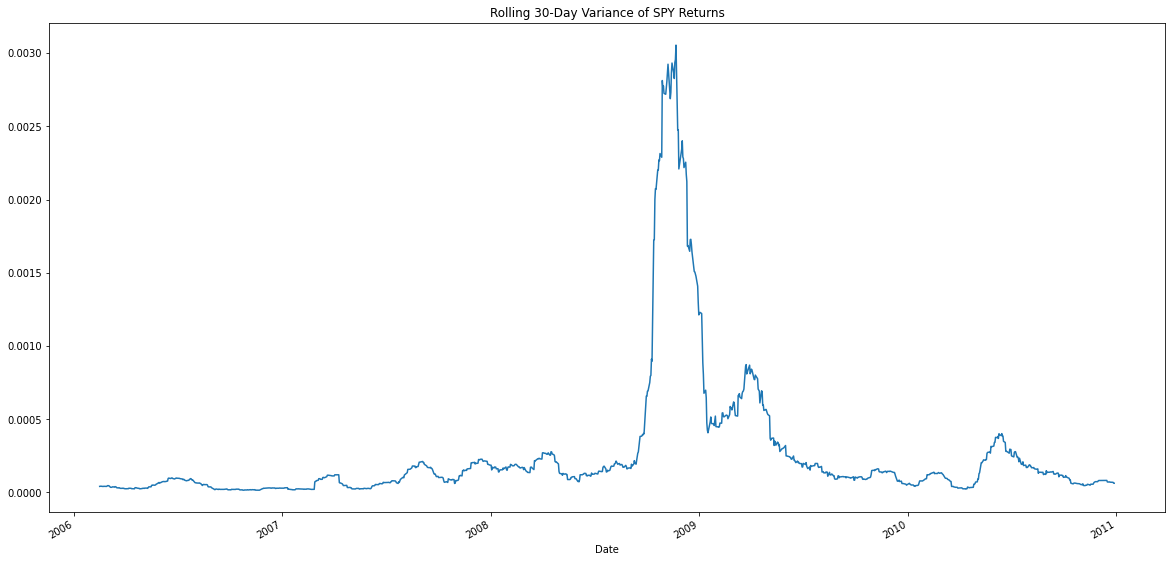

In [38]:
# Calculate 30-day rolling variance of XLF11 vs. SPY1 and plot the data
rolling_variancexlf1 = daily_returns1spy['SPY1'].rolling(window=30).var()
rolling_variancexlf1.plot(figsize=(20, 10), title='Rolling 30-Day Variance of SPY Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of VHT1'}, xlabel='Date'>

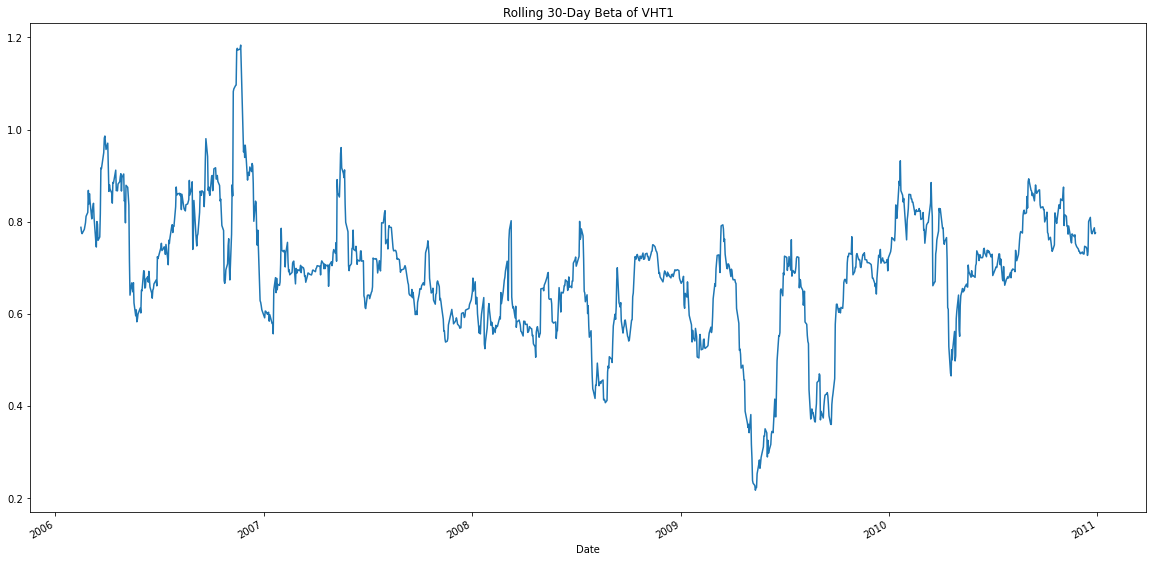

In [39]:
# Calculate 30-day rolling beta of VHT1 and plot the data
rolling_betavht1 = rolling_covariancevht1 / rolling_variancevht1
rolling_betavht1.plot(figsize=(20, 10), title='Rolling 30-Day Beta of VHT1')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of XLF1'}, xlabel='Date'>

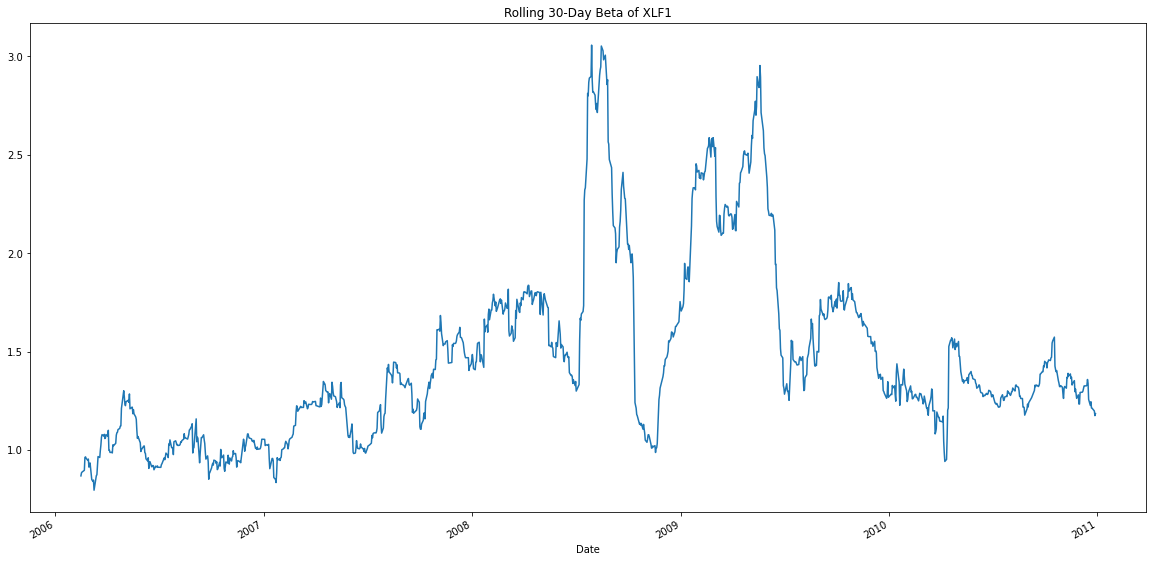

In [40]:
# Calculate 30-day rolling beta of XLF1 and plot the data
rolling_betaxlf1 = rolling_covariancexlf1 / rolling_variancexlf1
rolling_betaxlf1.plot(figsize=(20, 10), title='Rolling 30-Day Beta of XLF1')

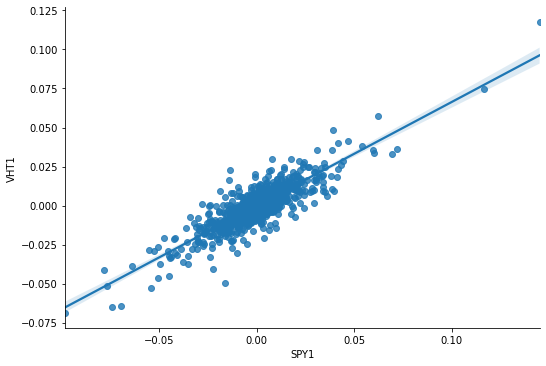

In [41]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='SPY1', y='VHT1', data=daily_returns1spy, aspect=1.5, fit_reg=True)

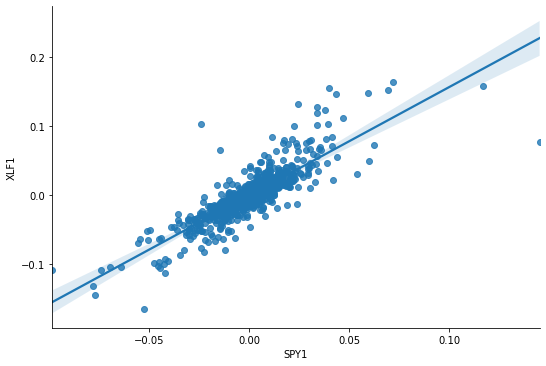

In [42]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='SPY1', y='XLF1', data=daily_returns1spy, aspect=1.5, fit_reg=True)

In [43]:
#SPY1 count the nulls
c1_spy_df.isnull().sum()
c1_spy_df.dropna(inplace = True)
c1_spy_df.head()

,Close
Date,
2006-01-03,126.70
2006-01-04,127.30
2006-01-05,127.38
2006-01-06,128.44
2006-01-09,128.77


In [44]:
#Rename Columns
c1_spy_df.rename(columns={"Close": "SPY"}, inplace=True)
c1_spy_df.head()

,SPY
Date,
2006-01-03,126.70
2006-01-04,127.30
2006-01-05,127.38
2006-01-06,128.44
2006-01-09,128.77


In [45]:
# Dip 1 all combined - Create a new pivot table where the columns are the closing prices for each ticker
final_combined_df1 = pd.concat([c1_xlf_df, c1_vht_df, c1_spy_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
final_combined_df1.sort_index(inplace=True)

# Set column names
final_combined_df1.columns = ['XLF1', 'VHT1', "SPY1"]

# Display a few rows
final_combined_df1.head()

,XLF1,VHT1,SPY1
Date,,,
2006-01-03,21.23,54.56,126.70
2006-01-04,21.21,55.13,127.30
2006-01-05,21.28,55.13,127.38
2006-01-06,21.41,55.50,128.44
2006-01-09,21.47,55.86,128.77


In [46]:
#Dip 1 all combined- Use the `pct_change` function to calculate daily returns
final_daily_returns1 = final_combined_df1.pct_change()
final_daily_returns1.head()

,XLF1,VHT1,SPY1
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,-0.000942,0.010447,0.004736
2006-01-05,0.003300,0.000000,0.000628
2006-01-06,0.006109,0.006711,0.008322
2006-01-09,0.002802,0.006486,0.002569


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

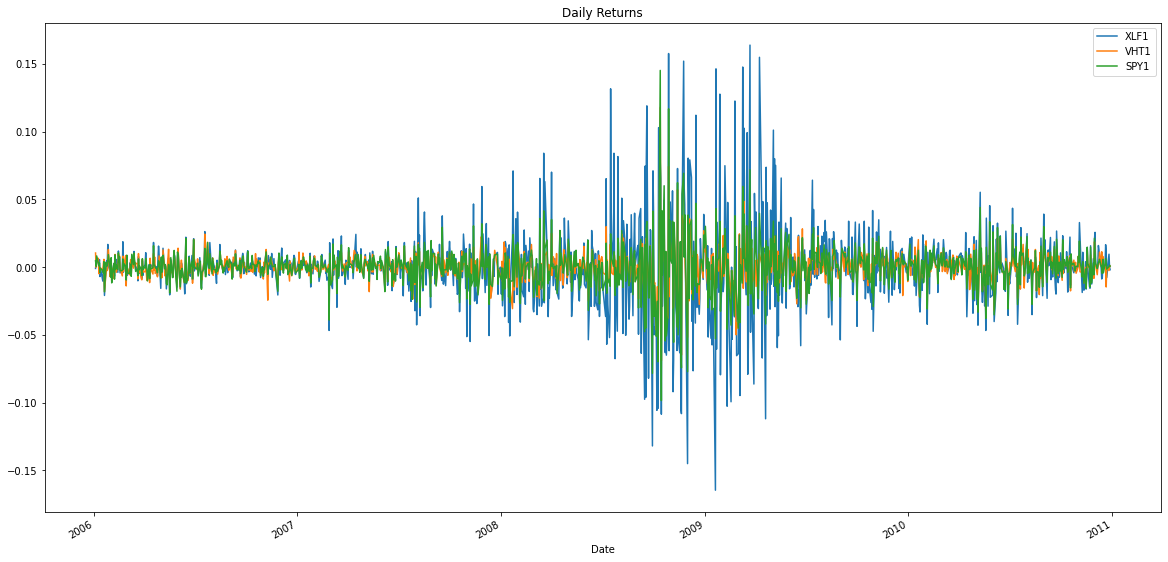

In [47]:
# Plot daily returns

final_daily_returns1.plot(title="Daily Returns", figsize=(20,10))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

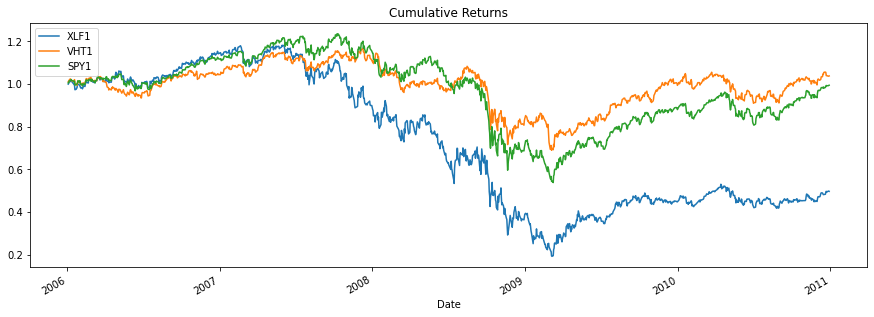

In [48]:
# Plot cumulative returns

final_cumulative_returns1 = (1 + final_daily_returns1).cumprod()
final_cumulative_returns1.plot(title="Cumulative Returns", figsize=(15,5))

Text(0.5, 1.0, 'Portfolio Risk')

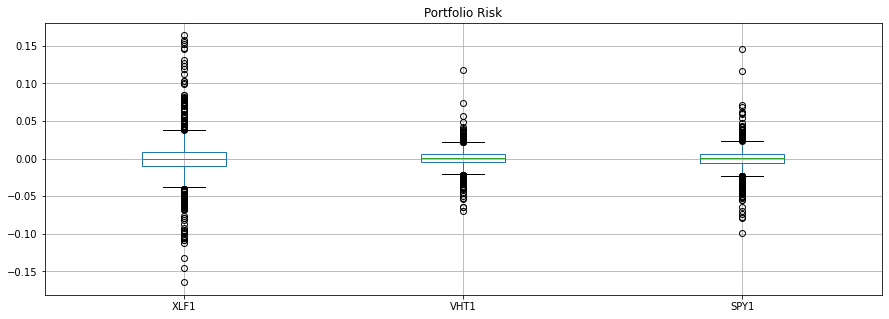

In [49]:
# Box plot to visually show risk

final_daily_returns1.boxplot(figsize=(15,5)).set_title("Portfolio Risk")

In [50]:
#Calculate daily standard dev. of s&p500

combined_daily_std = final_daily_returns1.std()
combined_daily_std

XLF1    0.029097
VHT1    0.012108
SPY1    0.015692
dtype: float64

In [51]:
#calculate annualized standard deviation (252 trading days)

annualized_combined_std = combined_daily_std * np.sqrt(252)
annualized_combined_std

XLF1    0.461902
VHT1    0.192208
SPY1    0.249108
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

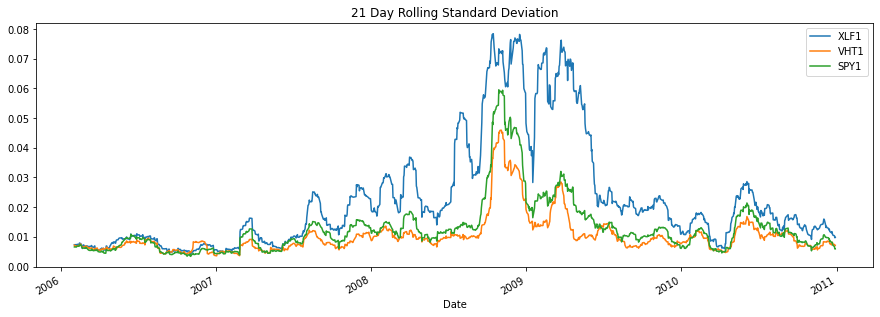

In [52]:
#calculate and plot rolling standard deviation for the s&p500 using a 21 day window

final_daily_returns1.rolling(window=21).std().plot(figsize=(15,5), title="21 Day Rolling Standard Deviation")

In [53]:
#calculate correlation

correlation = final_daily_returns1.corr()
correlation

,XLF1,VHT1,SPY1
XLF1,1.000000,0.666085,0.844519
VHT1,0.666085,1.000000,0.858985
SPY1,0.844519,0.858985,1.000000


<AxesSubplot:>

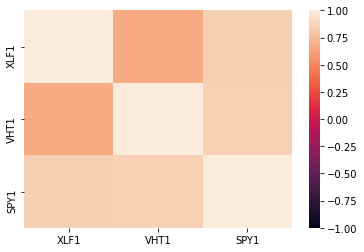

In [54]:
#calculate correlation & display correlation matrix

sns.heatmap(correlation,  vmin=-1, vmax=1,)

<AxesSubplot:title={'center':'VHT1 BETA'}, xlabel='Date'>

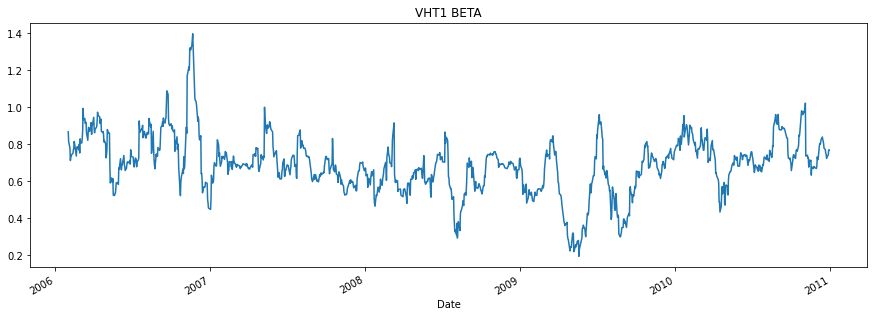

In [55]:
#calculate Beta for a single portfolio, variance of s&p500, compute Beta and plot Beta trend

rolling_covariance = final_daily_returns1['VHT1'].rolling(window=21).cov(final_daily_returns1['SPY1'])
rolling_variance = final_daily_returns1['SPY1'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15,5), title="VHT1 BETA")

<AxesSubplot:title={'center':'EXPONENTIAL WTG AVG'}, xlabel='Date'>

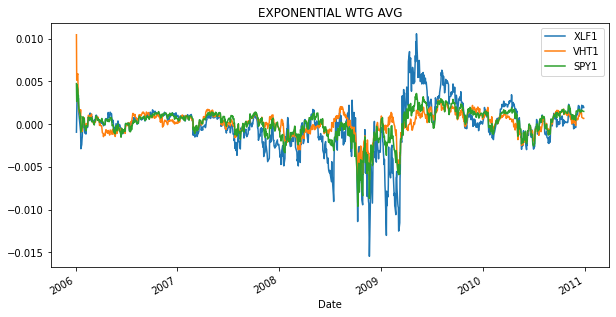

In [56]:
#EMW to calculate rolling window

expo_rolling_window = final_daily_returns1.ewm(halflife=21).mean()
expo_rolling_window.plot(figsize=(10,5), title="EXPONENTIAL WTG AVG")

<AxesSubplot:title={'center':'Sharpe Ratios'}>

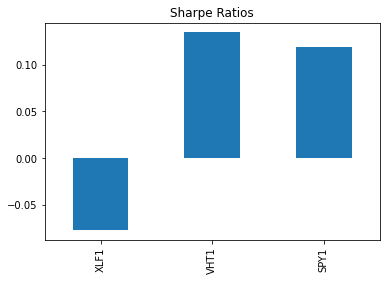

In [57]:
#annualizes sharpe ratio and visualize bar plot

sharpe_ratios = (final_daily_returns1.mean()*252) /(final_daily_returns1.std()*np.sqrt(252))
sharpe_ratios

sharpe_ratios.plot(kind ='bar', title ='Sharpe Ratios')

In [58]:
print("VHT1!!!!")

VHT1!!!!


In [59]:
#import new library
import altair as alt

In [62]:
final_daily_returns1.head()

,XLF1,VHT1,SPY1
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,-0.000942,0.010447,0.004736
2006-01-05,0.003300,0.000000,0.000628
2006-01-06,0.006109,0.006711,0.008322
2006-01-09,0.002802,0.006486,0.002569


In [ ]:
# !conda install -c conda-forge altair vega_datasets -y

In [97]:
import altair as alt
import pandas as pd
import numpy as np

source = final_daily_returns1.set_index("SPY1").dropna()
X = source[["XLF1", "VHT1"]]

XLF1 = source[["XLF1"]]
XLF1.columns= ["x"]
XLF1["category"]="XLF1"

VHT1 = source[["VHT1"]]
VHT1.columns= ["x"]
VHT1["category"]="VHT1"

y = source.index

source = pd.concat([XLF1, VHT1]).reset_index()
source.columns = ['SPY1', 'x', 'category']
source

,SPY1,x,category
0,0.004736,-0.000942,XLF1
1,0.000628,0.003300,XLF1
2,0.008322,0.006109,XLF1
3,0.002569,0.002802,XLF1
4,0.001010,0.000932,XLF1
...,...,...,...
2485,0.003110,-0.014604,VHT1
2486,-0.001431,0.000000,VHT1
2487,0.000398,-0.002470,VHT1
2488,0.001433,0.000177,VHT1


In [98]:

# source2 = source.reset_index().melt('SPY1', var_name='category', value_name='y')
# source2

In [99]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

In [100]:
# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='SPY1:Q',
    color='category:N'
)

In [101]:
line

alt.Chart(...)

In [102]:
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'SPY1:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)